
# Projet 2

In [60]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [61]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [3]:
## Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
geo["CP ville"] = (geo["Code Postal"] + " " + geo["Commune"])
geo["CP ville"] 

Code INSEE
01001    01400 L'ABERGEMENT-CLEMENCIAT
01002      01640 L'ABERGEMENT-DE-VAREY
01004          01500 AMBERIEU-EN-BUGEY
01005        01330 AMBERIEUX-EN-DOMBES
01006                    01300 AMBLEON
01007                   01500 AMBRONAY
01008                   01500 AMBUTRIX
01009           01300 ANDERT-ET-CONDON
                     ...              
97610                    97600 KOUNGOU
97611                  97600 MAMOUDZOU
97612                  97630 MTSAMBORO
97613              97650 M'TSANGAMOUJI
97614                   97670 OUANGANI
97615                   97610 PAMANDZI
97616                       97640 SADA
97617                   97680 TSINGONI
Name: CP ville, Length: 36742, dtype: object

In [86]:
## Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.

def ville(lat, long):
    f = geo.apply(lambda row: np.sqrt(((row["Longitude"]-long)**2)+((row["Latitude"]-lat)**2)),axis=1).idxmin()
    g = geo["Commune"][f]
    return g
ville(40.71, 7.00)

'BELVEDERE-CAMPOMORO'

In [87]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [88]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [89]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [5]:
## Utiliser la librairie Python json pour parser la colonne "geo_shape".
import json
y = geo.join(geo['geo_shape'].apply(json.loads).apply(pd.Series))
data = y[["type", "coordinates","Commune"]]
data

,type,coordinates,Commune
Code INSEE,,,
01001,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921...",L'ABERGEMENT-CLEMENCIAT
01002,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4...",L'ABERGEMENT-DE-VAREY
01004,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374...",AMBERIEU-EN-BUGEY
01005,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8...",AMBERIEUX-EN-DOMBES
01006,Polygon,"[[[5.614854625053272, 45.734638855121595], [5....",AMBLEON
01007,Polygon,"[[[5.413533405897647, 45.97889779714948], [5.3...",AMBRONAY
01008,Polygon,"[[[5.321986043355919, 45.92234494663176], [5.3...",AMBUTRIX
01009,Polygon,"[[[5.65639346945457, 45.76021095279123], [5.64...",ANDERT-ET-CONDON
...,...,...,...


In [4]:
## Donner le décompte des valeurs accédées avec la clé "type".
data["type"].value_counts()

Polygon         36670
MultiPolygon       72
Name: type, dtype: int64

In [9]:
## Donner le décompte des longueurs des listes accédées avec la clé "coordinates".

data['coordinates'].str.len().value_counts()


1    36660
2       80
3        1
4        1
Name: coordinates, dtype: int64

In [44]:
## Quelle commune est la plus complexe géométriquement ?

data['len'] = data['coordinates'].str.len()
Complexe_commune = data.sort_values(by='len', ascending=False)
Complexe_commune.head(1)


<ipython-input-44-3f0fc45d2149>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['len'] = data['coordinates'].str.len()


,type,coordinates,Commune,len
Code INSEE,,,,
83069,MultiPolygon,"[[[[6.116721717969871, 43.0347592631124], [6.0...",HYERES,4


In [43]:
##Quelle commune est la seconde la plus complexe géométriquement ?
Complexe_commune.iloc[[1]]

,type,coordinates,Commune,len
Code INSEE,,,,
27701,MultiPolygon,"[[[[1.219351692337786, 49.30031412963828], [1....",VAL-DE-REUIL,3


In [48]:
#Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
specific_cities = data[(data["type"] == "Polygon") & (data["len"] == 2)]
specific_cities["Commune"]

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

In [51]:
##Pour ces villes vérifier que le premier polygone contient bien le second (enclave). 
## NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry.
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


<ipython-input-56-f1033bb471d0>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  fig.add_subplot(2,len(sc)/2,i+1)


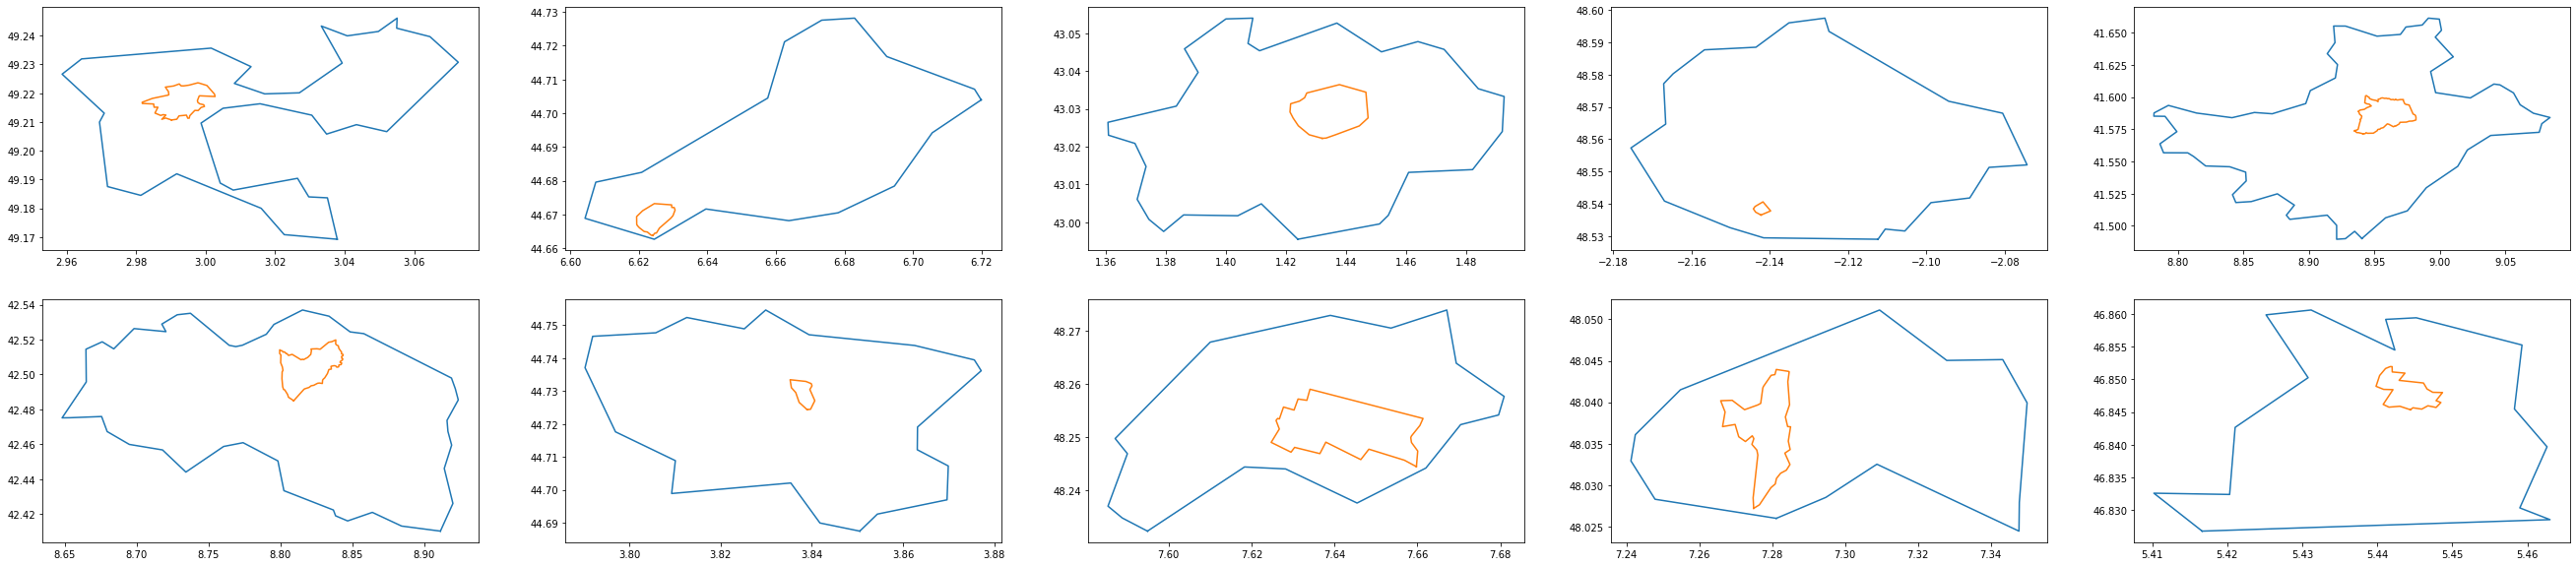

In [56]:
sc = specific_cities["coordinates"]

fig = plt.figure(figsize=(46,10))
for i,polygons in enumerate(sc):
    fig.add_subplot(2,len(sc)/2,i+1)
    for polygon in polygons:
        plt.plot(*Polygon(polygon).exterior.xy)

plt.show()